In [11]:
import pandas as pd
import numpy as np

# Load the featured CSV
df = pd.read_csv('/kaggle/input/02-feature-engineering-caiso-renewables/CAISO_Renewables_Featured.csv', parse_dates=['DateTime'])
df.set_index('DateTime', inplace=True)

# **Calculate 'total_renewables_calc' again after loading**
renewable_cols = ['Solar', 'Wind', 'Geothermal', 'Biomass', 'Small hydro']
df['total_renewables_calc'] = df[renewable_cols].sum(axis=1)

# **Print the columns to verify 'total_renewables_calc' exists**
print("Columns in df:")
print(df.columns)

# We'll forecast 'total_renewables_calc' (the actual calculated column)
target_col = 'total_renewables_calc'

for lag in [1, 2, 3, 24, 48, 72]:
    df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

print(df.head(75)) # Print the head to see the new lagged features

Columns in df:
Index(['Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas', 'Small hydro',
       'Coal', 'Nuclear', 'Natural Gas', 'Large Hydro', 'Batteries', 'Imports',
       'Other', 'Month', 'Year', 'year', 'month', 'day', 'hour', 'dayofweek',
       'is_weekend', 'total_renewables_calc'],
      dtype='object')
                     Solar    Wind  Geothermal  Biomass  Biogas  Small hydro  \
DateTime                                                                       
2021-09-01 00:00:00  -34.0  4547.0       928.0    281.0   195.0        168.0   
2021-09-01 00:05:00  -34.0  4528.0       929.0    283.0   201.0        169.0   
2021-09-01 00:10:00  -34.0  4511.0       929.0    281.0   208.0        146.0   
2021-09-01 00:15:00  -34.0  4514.0       929.0    280.0   214.0        140.0   
2021-09-01 00:20:00  -34.0  4515.0       929.0    281.0   215.0        140.0   
...                    ...     ...         ...      ...     ...          ...   
2021-09-01 05:50:00  -40.0  4038.0       893

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [12]:
for window in [3, 6, 12, 24]:
    df[f'{target_col}_roll_mean_{window}'] = df[target_col].shift(1).rolling(window=window).mean()
    df[f'{target_col}_roll_std_{window}'] = df[target_col].shift(1).rolling(window=window).std()


In [13]:
for window in [3, 6, 12, 24]:
    df[f'{target_col}_roll_mean_{window}'] = df[target_col].shift(1).rolling(window=window).mean()
    df[f'{target_col}_roll_std_{window}'] = df[target_col].shift(1).rolling(window=window).std()


In [14]:
df.dropna(inplace=True)


In [15]:
print(df.shape)
df.head()


(105020, 36)


,Solar,Wind,Geothermal,Biomass,Biogas,Small hydro,Coal,Nuclear,Natural Gas,Large Hydro,...,total_renewables_calc_lag_48,total_renewables_calc_lag_72,total_renewables_calc_roll_mean_3,total_renewables_calc_roll_std_3,total_renewables_calc_roll_mean_6,total_renewables_calc_roll_std_6,total_renewables_calc_roll_mean_12,total_renewables_calc_roll_std_12,total_renewables_calc_roll_mean_24,total_renewables_calc_roll_std_24
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-09-01 06:00:00,-41.0,4031.0,896.0,284.0,215.0,153.0,19.0,2261.0,8225.0,1421.0,...,5246.0,5890.0,5325.000000,2.000000,5319.666667,15.895492,5320.833333,28.203267,5301.208333,36.067544
2021-09-01 06:05:00,-41.0,4065.0,895.0,286.0,215.0,153.0,18.0,2260.0,8160.0,1352.0,...,5237.0,5875.0,5325.000000,2.000000,5323.833333,11.839200,5317.000000,23.851815,5304.458333,34.250965
2021-09-01 06:10:00,-41.0,4086.0,896.0,285.0,215.0,153.0,19.0,2261.0,8019.0,1366.0,...,5228.0,5833.0,5335.333333,19.655364,5332.833333,14.062954,5317.083333,24.005523,5308.708333,34.304872
2021-09-01 06:15:00,-41.0,4090.0,896.0,286.0,215.0,163.0,18.0,2260.0,8071.0,1385.0,...,5237.0,5829.0,5353.333333,28.290163,5339.166667,23.718488,5320.916667,29.761043,5314.333333,34.301308
2021-09-01 06:20:00,-38.0,4084.0,895.0,284.0,215.0,163.0,18.0,2260.0,8021.0,1315.0,...,5218.0,5831.0,5377.000000,18.083141,5351.000000,30.718073,5327.333333,36.400133,5319.916667,35.939462


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor


df = pd.read_csv("/kaggle/input/02-feature-engineering-caiso-renewables/CAISO_Renewables_Featured.csv", parse_dates=['DateTime'], index_col='DateTime')
df = df.sort_index()

# **Calculate 'total_renewables_calc' again after loading**
renewable_cols = ['Solar', 'Wind', 'Geothermal', 'Biomass', 'Small hydro']
df['total_renewables_calc'] = df[renewable_cols].sum(axis=1)

target = 'total_renewables_calc'
print("Columns in df after calculating total_renewables:")
print(df.columns)

# Assuming df has an hourly DateTime index

# Define the target column
target = 'total_renewables_calc'

# Split data: last 10 days for testing (hourly data)
split_point = df.index[-240]
train = df.loc[:split_point]
test = df.loc[split_point:]

X_train = train.drop(columns=[target])
y_train = train[target]
X_test = test.drop(columns=[target])
y_test = test[target]

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Columns in df after calculating total_renewables:
Index(['Solar', 'Wind', 'Geothermal', 'Biomass', 'Biogas', 'Small hydro',
       'Coal', 'Nuclear', 'Natural Gas', 'Large Hydro', 'Batteries', 'Imports',
       'Other', 'Month', 'Year', 'year', 'month', 'day', 'hour', 'dayofweek',
       'is_weekend', 'total_renewables_calc'],
      dtype='object')
Train size: (104865, 21), Test size: (240, 21)


Hyperparameter Tuning using TimeSeriesSplit



In [23]:
tscv = TimeSeriesSplit(n_splits=5)

model = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

params = {
    'n_estimators': [100, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(model, params, cv=tscv, scoring='neg_root_mean_squared_error', verbose=2)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END c

In [24]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 31.51
RMSE: 43.74


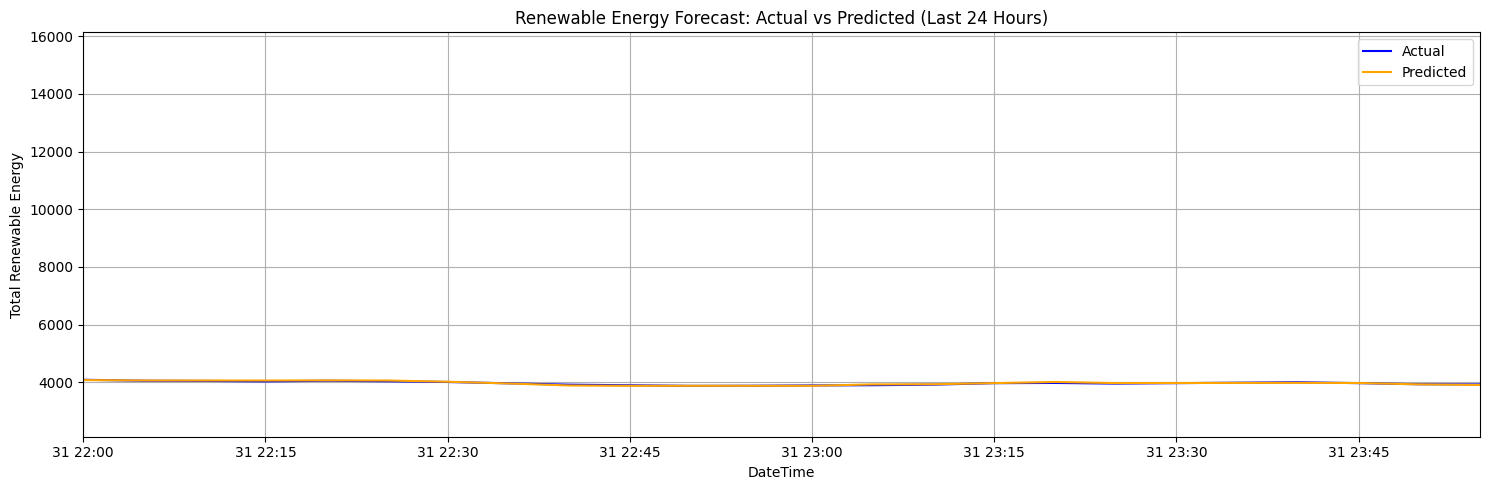

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title("Renewable Energy Forecast: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


24 Hours

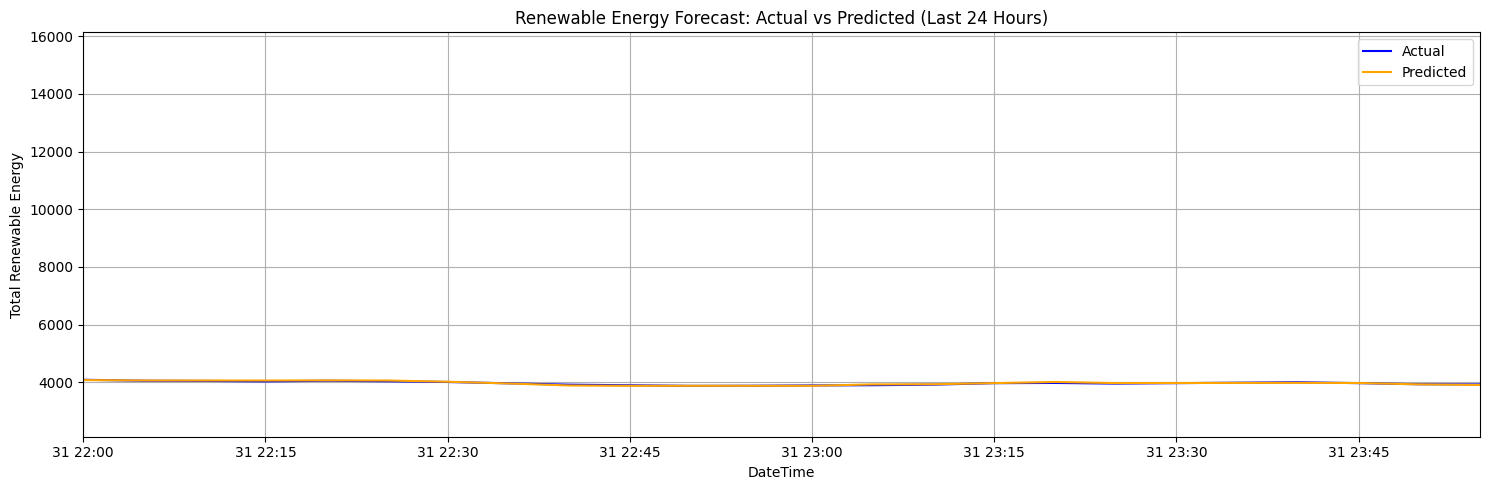

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title("Renewable Energy Forecast: Actual vs Predicted (Last 24 Hours)")
plt.xlabel("DateTime")
plt.ylabel("Total Renewable Energy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Zoom in on the last 24 hours
last_24_hours = y_test.index[-24:]  # Assuming hourly data
plt.xlim(last_24_hours.min(), last_24_hours.max())

plt.show()

1 Hour

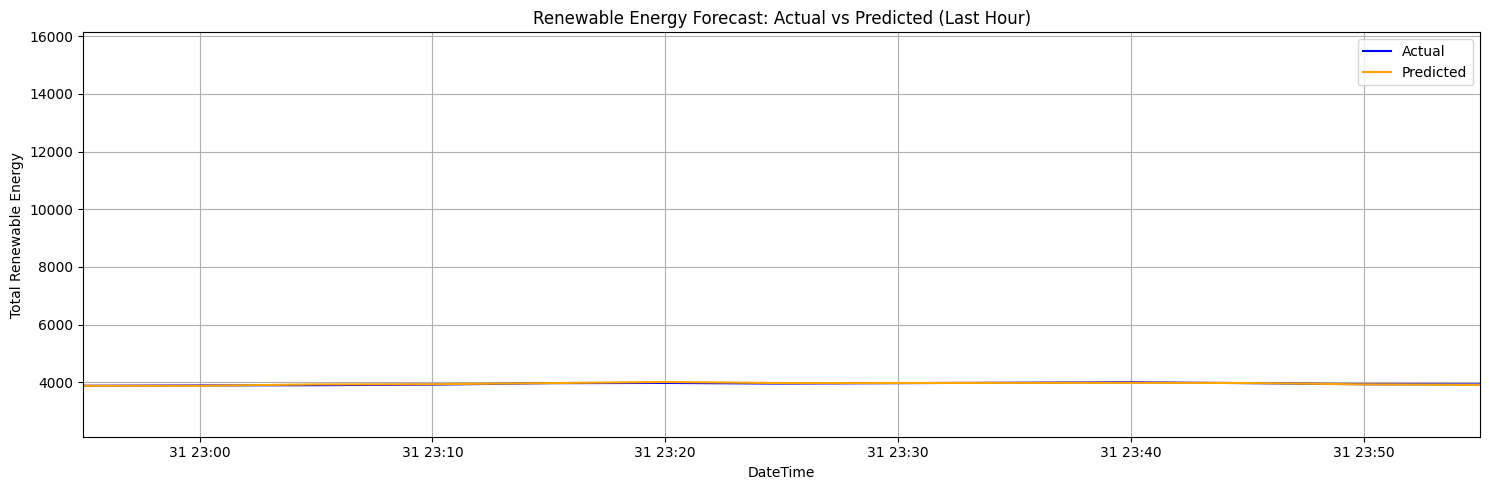

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title("Renewable Energy Forecast: Actual vs Predicted (Last Hour)")
plt.xlabel("DateTime")
plt.ylabel("Total Renewable Energy")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Zoom in on the last hour
last_hour_start = y_test.index[-1] - pd.Timedelta(hours=1)
last_hour_end = y_test.index[-1]
plt.xlim(last_hour_start, last_hour_end)

plt.show()

Feature importance Plot

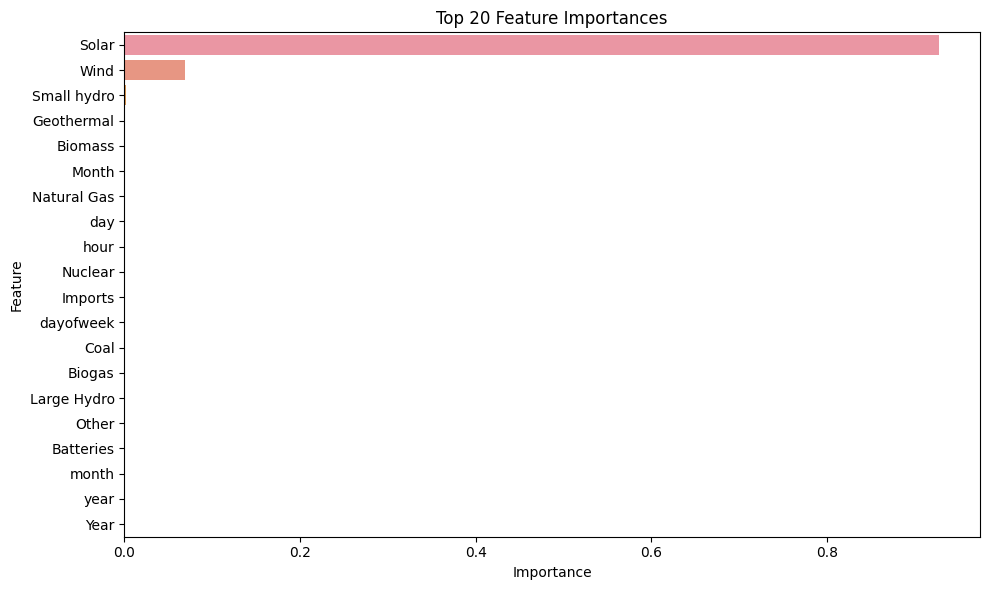

In [32]:
importances = best_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()
